In [1]:
import zipfile

with zipfile.ZipFile("utkface-new.zip", 'r') as zip_ref:
    zip_ref.extractall("utkface_dataset")


In [3]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/f6/d4/349f7f4bd5ea92dab34f5bb0fe31775ef6c311427a14d5a5b31ecb442341/absl_py-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.3.81 requires py-cpuinfo, which is not installed.
ultralytics 8.3.81 requires numpy<=2.1.1,>=1.23.0, but you have numpy 2.1.3 which is incompatible.


In [4]:
## Importing Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
##Dataset
dataset_path = r'C:\Users\ALEEN\OneDrive\Desktop\Kaggle\Age and gender\utkface_dataset\UTKFace'


In [6]:
##Preprocess
img_size = 100
images, ages, genders = [], [], []

for filename in os.listdir(dataset_path):
    try:
        age, gender, _ = filename.split('_')[:3]
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        ages.append(int(age))
        genders.append(int(gender))
    except:
        continue

images = np.array(images) / 255.0
ages = np.array(ages)
genders = to_categorical(genders, num_classes=2)


In [7]:
###Train test split
X_train, X_test, age_train, age_test, gender_train, gender_test = train_test_split(
    images, ages, genders, test_size=0.2, random_state=42
)


In [34]:
###Model Architecture
from tensorflow.keras.layers import BatchNormalization

def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(1, name='age_output'),
    ])
    return model


In [35]:
### Compile and train
model = build_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, age_train, validation_data=(X_test, age_test), epochs=10, batch_size=32)
model.save('age_gender_model.h5')


Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 127s 207ms/step - loss: 254.4088 - mae: 11.6670 - val_loss: 131.5758 - val_mae: 8.7939
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 122s 206ms/step - loss: 105.6438 - mae: 7.7780 - val_loss: 130.1063 - val_mae: 8.4393
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 129s 218ms/step - loss: 84.0745 - mae: 6.9721 - val_loss: 162.2350 - val_mae: 9.4822
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 114s 192ms/step - loss: 71.3359 - mae: 6.4246 - val_loss: 139.3328 - val_mae: 9.3897
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 112s 189ms/step - loss: 61.5423 - mae: 5.9729 - val_loss: 105.1347 - val_mae: 7.4698
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 115s 195ms/step - loss: 55.2205 - mae: 5.6352 - val_loss: 92.5184 - val_mae: 7.2027
Epoch 7/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 112s 189ms/step - loss: 47.6954 - mae: 5.3011 - val_loss: 94.3658 - val_mae: 7.3862
Epoch 8/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 114s 192ms/step - loss: 42.0626 - mae: 4.9501 - val_loss: 93.7706 - val_mae: 7.2296


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


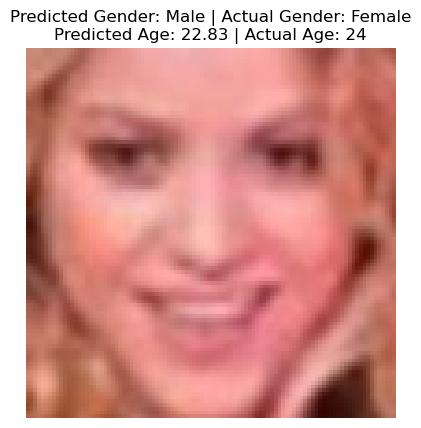

In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.metrics import MeanSquaredError

# Load the model and define the metric manually
model = load_model("age_gender_model.h5", custom_objects={'mse': MeanSquaredError()})


# Path to dataset
data_path = r"C:\Users\ALEEN\OneDrive\Desktop\Kaggle\Age and gender\utkface_dataset\UTKFace"


# Gender dictionary
gender_label = {0: "Male", 1: "Female"}

# Randomly pick an image
img_name = random.choice(os.listdir(data_path))
img_path = os.path.join(data_path, img_name)

# Parse gender and age from filename (assuming format is: age_gender_race)
true_age = int(img_name.split("_")[0])  # The first part is the age
true_gender = int(img_name.split("_")[1])  # The second part is the gender

# Read and preprocess the image
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (100, 100))  # Ensure the size matches the model's input size
img_input = img_resized / 255.0  # Normalize pixel values to [0, 1]
img_input = np.expand_dims(img_input, axis=0)  # Add batch dimension

# Predict both age and gender
pred = model.predict(img_input)

# Predict gender (Softmax for gender)
pred_gender = np.argmax(pred[0])  # Gender output, assuming softmax

# Predict age (Assuming regression output for age)
pred_age = pred[0]  # Age output (regression)

# Map gender prediction to label
predicted_label_gender = gender_label[pred_gender]
true_label_gender = gender_label[true_gender]

# Show image with predicted and true gender and age
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Gender: {predicted_label_gender} | Actual Gender: {true_label_gender}\n"
          f"Predicted Age: {pred_age[0]:.2f} | Actual Age: {true_age}")
plt.axis('off')
plt.show()

In [8]:
# Validation Graph
import matplotlib.pyplot as plt

# Retrieve history
history = model.history.history

# Plot Training vs Validation Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['age_output_loss'], label='Training Loss (Age)')
plt.plot(history['val_age_output_loss'], label='Validation Loss (Age)')
plt.title('Training vs Validation Loss (Age)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['age_output_mae'], label='Training MAE (Age)')
plt.plot(history['val_age_output_mae'], label='Validation MAE (Age)')
plt.title('Training vs Validation Accuracy (Age)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.show()


AttributeError: 'Sequential' object has no attribute 'history'

In [3]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict on the test set for gender (we need only gender predictions here)
gender_preds = model.predict(X_test)

# Get the predicted gender class (0 or 1) based on softmax output
gender_preds = np.argmax(gender_preds[1], axis=1)

# Get the true gender class
gender_true = np.argmax(gender_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(gender_true, gender_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix for Gender Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


NameError: name 'X_test' is not defined